In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.2.0
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.3.4
numpy 1.19.5
pandas 1.1.5
sklearn 0.24.2
tensorflow 2.2.0
tensorflow.keras 2.3.0-tf


In [2]:
from sklearn import datasets
import tarfile
data_home = datasets.get_data_home()
archive_path = os.path.join(data_home, 'cal_housing.tgz')
with tarfile.open(mode="r:gz", name=archive_path) as f:
     cal_housing = np.loadtxt(
         f.extractfile("CaliforniaHousing/cal_housing.data"), delimiter=","
     )
     # Columns are not in the same order compared to the previous
     # URL resource on lib.stat.cmu.edu
     columns_index = [8, 7, 2, 3, 4, 5, 6, 1, 0]
     cal_housing = cal_housing[:, columns_index]
       
feature_names = [
    "MedInc",
    "HouseAge",
    "AveRooms",
    "AveBedrms",
    "Population",
    "AveOccup",
    "Latitude",
    "Longitude",
]

target, data = cal_housing[:, 0], cal_housing[:, 1:]

# avg rooms = total rooms / households
data[:, 2] /= data[:, 5]

# avg bed rooms = total bed rooms / households
data[:, 3] /= data[:, 5]

# avg occupancy = population / households
data[:, 5] = data[:, 4] / data[:, 5]

# target in units of 100,000
target = target / 100000.0


In [3]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    data, target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)


(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [12]:
#修改超参数 学习率
# learning_rate: [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2]
#grad就是导数
# W = W + grad * learning_rate

# learning_rates = [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2,3e-1]
learning_rates = [1e-2, 1e-4,3e-1]
#初始化空的列表
histories = []
for lr in learning_rates:
    model = keras.models.Sequential([
        keras.layers.Dense(30, activation='relu',
                           input_shape=x_train.shape[1:]),
        keras.layers.Dense(1),
    ])
    #这里用我们自己的optimizer，原来我们是‘sgd’
    optimizer = keras.optimizers.SGD(lr)
    model.compile(loss="mean_squared_error", optimizer=optimizer)
    callbacks = [keras.callbacks.EarlyStopping(
        patience=5, min_delta=1e-2)]
    history = model.fit(x_train_scaled, y_train,
                        validation_data = (x_valid_scaled, y_valid),
                        epochs = 100,
                        callbacks = callbacks)
    #我们需要保存所有的history
    histories.append(history)

Epoch 1/100
363/363 [==============================] - 1s 3ms/step - loss: 1.1059 - val_loss: 0.8036
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.8492 - val_loss: 2.1790
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4737 - val_loss: 0.4498
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4129 - val_loss: 0.4175
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4006 - val_loss: 0.4028
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3890 - val_loss: 0.3928
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3832 - val_loss: 0.3898
Epoch 8/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4044 - val_loss: 0.3852- ETA: 0s - loss: 0 - ETA: 0s - loss: 0.408 - ETA: 0s - loss: 0.404
Epoch 9/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3737 - val_loss: 0.3831
Epoch 10/100
363/363 [==

363/363 [==============================] - 1s 3ms/step - loss: 0.5456 - val_loss: 0.5900
Epoch 63/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5434 - val_loss: 0.5877
Epoch 64/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5414 - val_loss: 0.5854
Epoch 65/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5393 - val_loss: 0.5833
Epoch 66/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5374 - val_loss: 0.5811
Epoch 67/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5355 - val_loss: 0.5790
Epoch 68/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5336 - val_loss: 0.5768
Epoch 69/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5318 - val_loss: 0.5748
Epoch 70/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5300 - val_loss: 0.5729
Epoch 71/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5283 - val_loss: 

Learning rate:  0.01
0.35783129930496216 0.36481231451034546


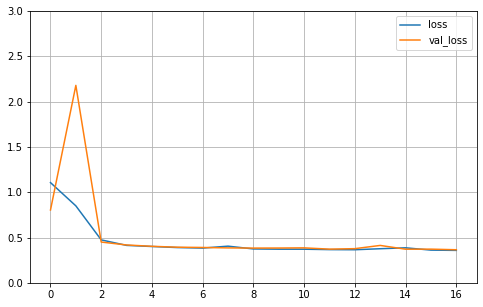

Learning rate:  0.0001
0.5202701687812805 0.5620763897895813


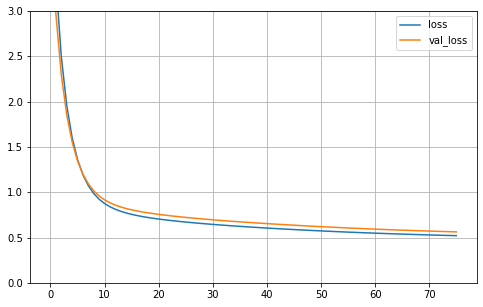

Learning rate:  0.3
nan nan


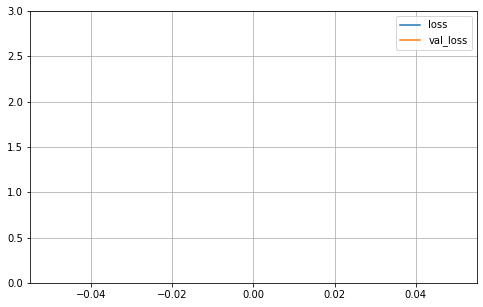

In [13]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 3)
    plt.show()

for lr, history in zip(learning_rates, histories):
    print("Learning rate: ", lr)
    print(history.history['loss'][-1],history.history['val_loss'][-1])
    plot_learning_curves(history)

In [11]:
history.history

{'loss': [nan, nan, nan, nan, nan], 'val_loss': [nan, nan, nan, nan, nan]}